# Nuclear Statistical Equilibrium

Pynucastro is able to calculate the abundances at nuclear statistical equilibrium of a given reaction network by solving NSE equations using scipy.fsolve(). (see https://iopscience.iop.org/article/10.1086/510709/pdf and https://www.sciencedirect.com/science/article/abs/pii/S0092640X0800051X).

This notebook gives an illustration of this feature.

In [1]:
import pynucastro as pyna
import numpy as np
import matplotlib.pyplot as plt

We start by creating a `Library` object that reads all the ReacLib rates and link different nuclei of choice. Then initialize `RateCollection` by using the the rates created by the `Library` object.

In [2]:
library = pyna.ReacLibLibrary()
sub = library.linking_nuclei(["p","n","he3","he4","c12","c13","n13","n14","o14","o15",
                             "o16","o17","o18","f17","f18","f19","ne18","ne19","ne20",
                             "mg22","mg24","al27","si28","p31","s32","cl35",
                             "ar36","k39","ca40","ti44","ti50","cr48","cr49","cr50","cr51",
                             "cr52","cr53","cr54","fe52","fe54","fe55","fe56","fe57",
                             "fe58","co53","co55","ni55","ni56","ni58","ni59","ni60",
                              "ni61","ni62","ni63","ni64","ni66","ni67","ni68","ni69","ni70","cu57"])

rc = pyna.RateCollection(libraries=sub)

`get_comp_NSE(rho,T,ye)` is a method of `RateCollection` that returns composition at NSE as an object `Composition` by providing density, temperature, and a presribed electron fraction. There is pre-set initial guess, however one should adjust the initial guess, accordingly if no solutions are found or taking a long time as the algorithm is searching for the correct initial guess.

This method can also return the guess that actually found the solution after making fine adjustments, so one should adjust the initial guess to those numbers so it does not spend time searching for the correct guess, it is especially true when solving for NSE abundances as a function of density, temperature, or electron fraction.

One can also turn on the printing of the correction guess solution by `tell_guess=True`

In [3]:
comp = rc.get_comp_NSE(3e8,3e9,0.5)
print(comp)

  X(n) : 7.236787674869669e-20
  X(p) : 1.7218890181875542e-06
  X(he3) : 1.0258111272465218e-21
  X(he4) : 3.199541031405049e-08
  X(c12) : 3.627594457180118e-17
  X(c13) : 3.7473759306385804e-30
  X(n13) : 9.152407291833295e-22
  X(n14) : 2.4449861065519733e-25
  X(o14) : 7.475776222572022e-22
  X(o15) : 6.029681287917067e-21
  X(o16) : 6.050233902141221e-16
  X(o17) : 2.6899467167107302e-30
  X(o18) : 4.1752107863412887e-38
  X(f17) : 8.823881599575415e-23
  X(f18) : 1.0578685311087103e-28
  X(f19) : 4.6805561227900424e-32
  X(ne18) : 4.5238713525567524e-24
  X(ne19) : 1.935985863441722e-25
  X(ne20) : 7.736559227270263e-19
  X(mg22) : 3.2860808627538333e-21
  X(mg24) : 4.937458079327762e-14
  X(al27) : 1.0103022113962893e-19
  X(si28) : 4.041356573953294e-08
  X(p31) : 2.4525385446436576e-14
  X(s32) : 2.714885730801391e-07
  X(cl35) : 1.9992217883485134e-13
  X(ar36) : 5.763973860251045e-07
  X(k39) : 3.9704166536035865e-12
  X(ca40) : 5.899308435868473e-06
  X(ti44) : 4.146671961

/home/zhi/Github/pynucastro/pynucastro/networks/rate_collection.py:611: RuntimeWarning: overflow encountered in exp
  *np.exp((nuc.Z*u[0]+nuc.N*u[1]-u_c+nuc.nucbind*nuc.A)/k/T*1.6022e-6)
/home/zhi/Github/pynucastro/pynucastro/networks/rate_collection.py:126: RuntimeWarning: invalid value encountered in multiply
  electron_frac = np.sum(zvec*xvec/avec)/np.sum(xvec)
/usr/lib64/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Here we show mass fraction as function of electron fraction and in comparison to Figure 1 and 3 in paper: https://www.sciencedirect.com/science/article/abs/pii/S0092640X0800051X.

For $\rho = 1\times 10^7 [g/cm^{3}]$ and a relatively high temperature of $ T = 9 \times 10^9 [K]$

In [4]:
rho = 1e7
ye_s = np.linspace(0.4,0.6,50)
temp = 9.0e9
X_s_1 = []

for i, ye in enumerate(ye_s):
    nse_comp_1 = rc.get_comp_NSE(rho, temp, ye, init_guess=[-6.0,-11.5], tell_guess=False)
    nse_X_s_1 = [nse_comp_1.X[nuc] for nuc in nse_comp_1.X]
    X_s_1.append(nse_X_s_1)

Text(0.5, 1.0, '$\\rho = 1e7$ and $T=9e9$')

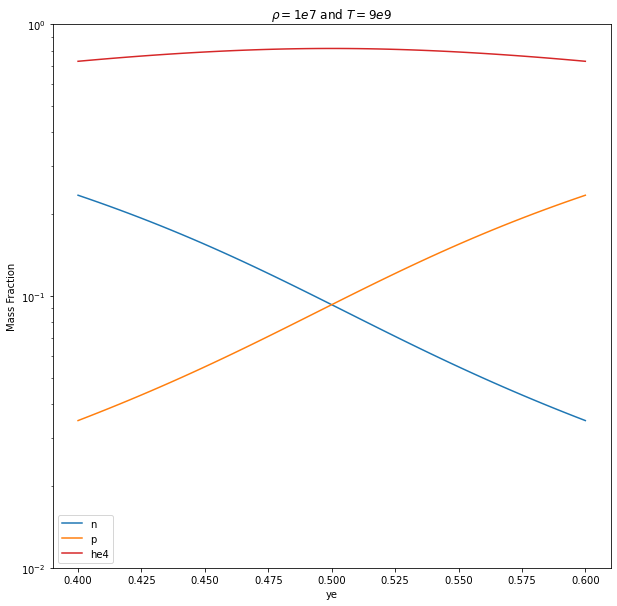

In [5]:
X_s_1 = np.array(X_s_1)
nuc_names = rc.get_nuclei()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for k in range(len(nuc_names)):
    line, = ax.plot(ye_s, X_s_1[:,k])
    if (max(X_s_1[:,k]) > 0.01):
        line.set_label(str(nuc_names[k]))
ax.legend(loc = "best")
ax.set_xlabel('ye')
ax.set_ylabel('Mass Fraction')
ax.set_yscale('log')
ax.set_ylim([0.01,1])
ax.set_title(r"$\rho = 1e7$ and $T=9e9$")

For $\rho = 1\times 10^7 [g/cm^{3}]$ and a relatively low temperature of $ T = 3.5\times 10^9 [K]$

In [6]:
rho = 1e7
ye_s = np.linspace(0.4,0.6,50)
temp = 3.5e9
X_s_3 = []

for i, ye in enumerate(ye_s):
    nse_comp_3 = rc.get_comp_NSE(rho, temp, ye, init_guess=[-6.0,-11.5], tell_guess=False)
    nse_X_s_3 = [nse_comp_3.X[nuc] for nuc in nse_comp_3.X]
    X_s_3.append(nse_X_s_3)

/home/zhi/Github/pynucastro/pynucastro/networks/rate_collection.py:610: RuntimeWarning: overflow encountered in double_scalars
  comp_NSE.X[nuc] = m_u*nuc.A_nuc*nuc.partition_function(T)/rho*(2.*np.pi*m_u*nuc.A_nuc*k*T/h**2)**(3./2.) \
/home/zhi/Github/pynucastro/pynucastro/networks/rate_collection.py:126: RuntimeWarning: invalid value encountered in double_scalars
  electron_frac = np.sum(zvec*xvec/avec)/np.sum(xvec)
/home/zhi/Github/pynucastro/pynucastro/networks/rate_collection.py:126: RuntimeWarning: overflow encountered in multiply
  electron_frac = np.sum(zvec*xvec/avec)/np.sum(xvec)
/usr/lib64/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Text(0.5, 1.0, 'T = 3.5e9, $\\rho = 1e7$')

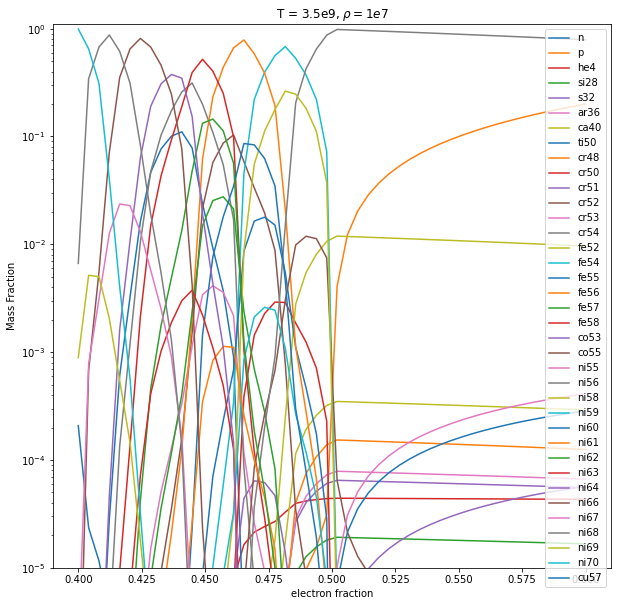

In [7]:
X_s_3 = np.array(X_s_3)
nuc_names = rc.get_nuclei()
low_limit = 1e-5
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for k in range(len(nuc_names)):
    line, = ax.plot(ye_s, X_s_3[:,k])
    if (max(X_s_3[:,k]) > low_limit):
        line.set_label(str(nuc_names[k]))

ax.legend(loc = "upper right")
ax.set_xlabel('electron fraction')
ax.set_ylabel('Mass Fraction')
ax.set_yscale('log')
ax.set_ylim([low_limit,1.1])
ax.set_title(r"T = 3.5e9, $\rho = 1e7$")